## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('tele_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [3]:

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,OneLine,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,OneLine,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,OneLine,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
report = df.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

### Continuous Variables

### Outlier Check

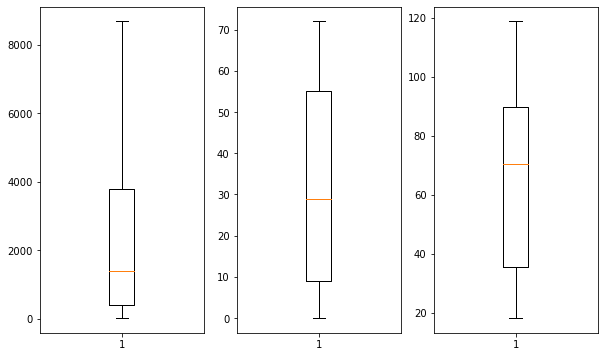

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (10,6))
ax1.boxplot(df[['TotalCharges']])
ax2.boxplot(df[['tenure']])
ax3.boxplot(df[['MonthlyCharges']])
plt.show()

We see that there is no outlier in our continous variables. 

From the correlation matrix, we see that `tenure` and `TotalCharges` have high correlation coefficient. 

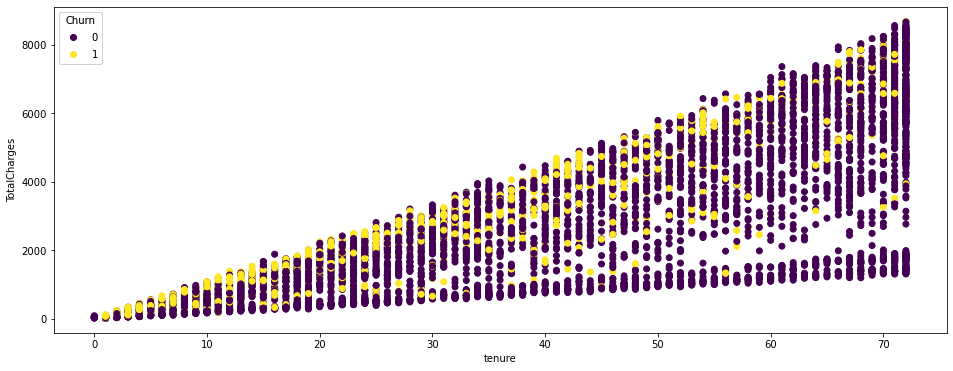

In [6]:
color = [1 if x == 'Yes' else 0 for x in df['Churn']]
fig, ax = plt.subplots(figsize = (16,6))

scatter = ax.scatter('tenure', 'TotalCharges', c = color, label = ['Yes', 'No'], data = df)
plt.xlabel('tenure')
plt.ylabel('TotalCharges')
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper left", title="Churn")
ax.add_artist(legend1)
plt.show()

We see that there is clear upward trend in the scatter chart. This makes sense since the longer one's tenured, the more one pays. The interesting thing is that as user's tenure grow, the spread of `TotalCharges` grow as well. It could be a potential feature to investigate in. 

Furthermore, users are more likely to churn when they are early in their tenure and most churn users appear at the top of the chart, meaning that prices are a driver to their decisions.

### Categorical Variable

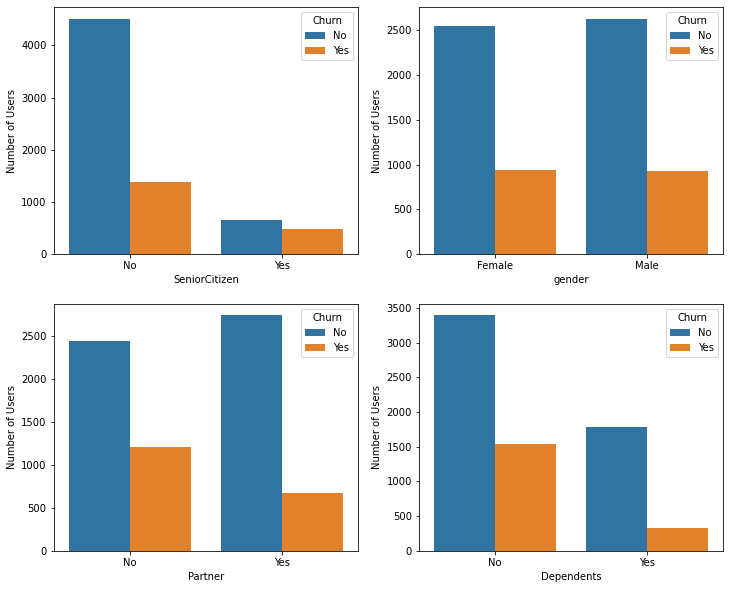

In [7]:
cat_df = df.drop(columns = ['customerID', 'tenure', 'TotalCharges', 'MonthlyCharges'])

senior_df = cat_df.groupby('SeniorCitizen')['Churn'].value_counts().to_frame()
senior_df = senior_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

gender_df = cat_df.groupby('gender')['Churn'].value_counts().to_frame()
gender_df = gender_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

partner_df = cat_df.groupby('Partner')['Churn'].value_counts().to_frame()
partner_df = partner_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

dep_df = cat_df.groupby('Dependents')['Churn'].value_counts().to_frame()
dep_df = dep_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

fig, axis = plt.subplots(2, 2, figsize=(12,10))

ax = sns.barplot(x= 'SeniorCitizen', y='Number of Users', hue='Churn', data = senior_df, ax = axis[0,0])

ax = sns.barplot(x= 'gender', y='Number of Users', hue='Churn', data = gender_df, ax = axis[0,1])

ax = sns.barplot(x= 'Partner', y='Number of Users', hue='Churn', data = partner_df, ax = axis[1,0])

ax = sns.barplot(x= 'Dependents', y='Number of Users', hue='Churn', data = dep_df, ax = axis[1,1])

From these graphs, we see that gender doens't seem to impact churn and should probably not be used in our model. Churn rates seem to be a lot higher for Seniors. Users with no partner are more likely to churn and users with no dependents are also more likely to churn.

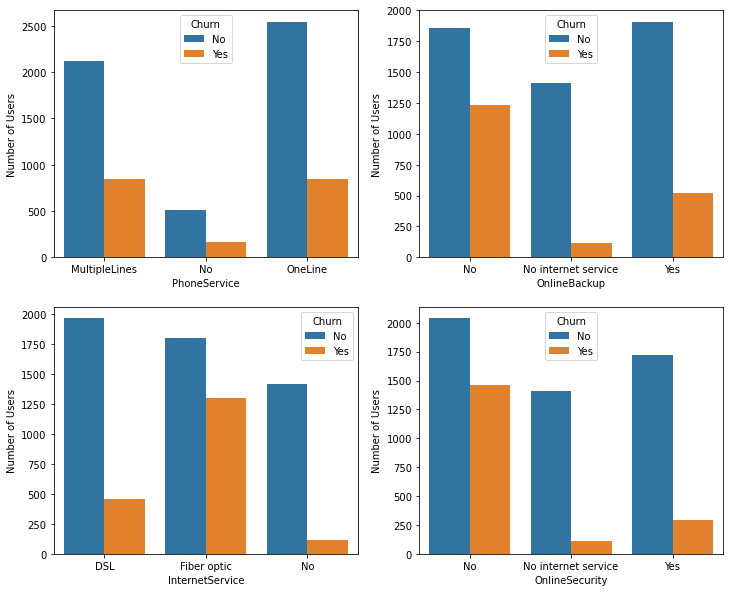

In [10]:
phone_df = cat_df.groupby('PhoneService')['Churn'].value_counts().to_frame()
phone_df = phone_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

ob_df = cat_df.groupby('OnlineBackup')['Churn'].value_counts().to_frame()
ob_df = ob_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

int_df = cat_df.groupby('InternetService')['Churn'].value_counts().to_frame()
int_df = int_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

secure_df = cat_df.groupby('OnlineSecurity')['Churn'].value_counts().to_frame()
secure_df = secure_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

fig, axis = plt.subplots(2, 2, figsize=(12,10))

ax = sns.barplot(x= 'PhoneService', y='Number of Users', hue='Churn', data = phone_df, ax = axis[0,0])

ax = sns.barplot(x= 'OnlineBackup', y='Number of Users', hue='Churn', data = ob_df, ax = axis[0,1])

ax = sns.barplot(x= 'InternetService', y='Number of Users', hue='Churn', data = int_df, ax = axis[1,0])

ax = sns.barplot(x= 'OnlineSecurity', y='Number of Users', hue='Churn', data = secure_df, ax = axis[1,1])

Phone service doesn't seem to impact churn rate. On the other hand, users without internet service have very little churn rate while users with internet service but choose to not have online backup have higer churn rate. Users who choose DSL are less likely to churn and those without online security are more likely to churn. 


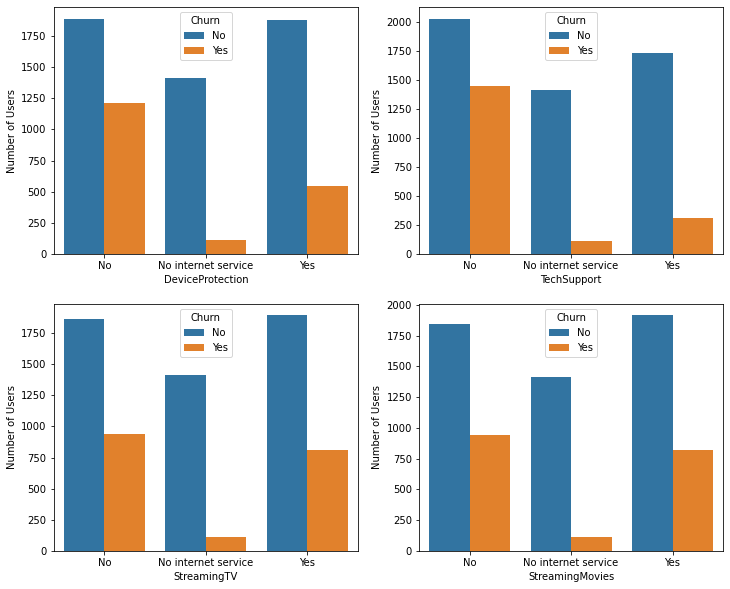

In [17]:
device_df = cat_df.groupby('DeviceProtection')['Churn'].value_counts().to_frame()
device_df = device_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

sup_df = cat_df.groupby('TechSupport')['Churn'].value_counts().to_frame()
sup_df = sup_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

tv_df = cat_df.groupby('StreamingTV')['Churn'].value_counts().to_frame()
tv_df = tv_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

movies_df = cat_df.groupby('StreamingMovies')['Churn'].value_counts().to_frame()
movies_df = movies_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

fig, axis = plt.subplots(2, 2, figsize=(12,10))

ax = sns.barplot(x= 'DeviceProtection', y='Number of Users', hue='Churn', data = device_df, ax = axis[0,0])

ax = sns.barplot(x= 'TechSupport', y='Number of Users', hue='Churn', data = sup_df, ax = axis[0,1])

ax = sns.barplot(x= 'StreamingTV', y='Number of Users', hue='Churn', data = tv_df, ax = axis[1,0])

ax = sns.barplot(x= 'StreamingMovies', y='Number of Users', hue='Churn', data = movies_df, ax = axis[1,1])

We see that streaming services do not seem to have an impact while users with no technology support seem to have a higher churn rate.

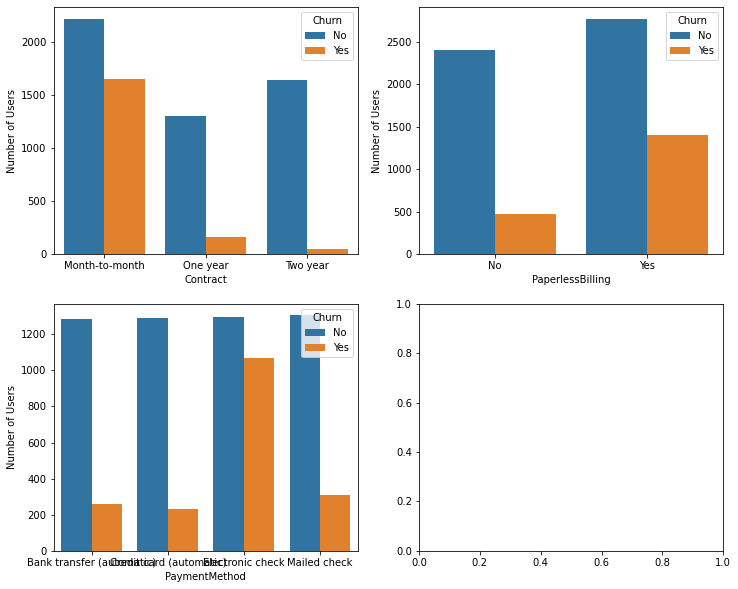

In [25]:
contract_df = cat_df.groupby('Contract')['Churn'].value_counts().to_frame()
contract_df = contract_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

bill_df = cat_df.groupby('PaperlessBilling')['Churn'].value_counts().to_frame()
bill_df = bill_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

payment_df = cat_df.groupby('PaymentMethod')['Churn'].value_counts().to_frame()
payment_df = payment_df.rename(columns={'Churn': 'Number of Users'}).reset_index()

fig, axis = plt.subplots(2, 2, figsize=(12,10))

ax = sns.barplot(x= 'Contract', y='Number of Users', hue='Churn', data = contract_df, ax = axis[0,0])

ax = sns.barplot(x= 'PaperlessBilling', y='Number of Users', hue='Churn', data = bill_df, ax = axis[0,1])

ax = sns.barplot(x= 'PaymentMethod', y='Number of Users', hue='Churn', data = payment_df, ax = axis[1,0])

It looks like users with paperless billing and paying through electronic check have a higher chance of churn than others. Similarly, month-to-month users are more likely to churn than year-round contract users.

### Extra Charges

A potentially useful feature to include the difference between `Totalcharges` and `MonthlyCharges` * `tenure`. 

In [26]:
## Extra Charge

df['ExtraCharges'] = df['TotalCharges'] - df['MonthlyCharges'] * df['tenure']
df.head()

# Delete TotalCharges because of collinearity

df.drop(columns = 'TotalCharges', inplace = True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,ExtraCharges
0,7590-VHVEG,Female,No,Yes,No,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,0.00
1,5575-GNVDE,Male,No,No,No,34,OneLine,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,-46.80
2,3668-QPYBK,Male,No,No,No,2,OneLine,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,0.45
3,7795-CFOCW,Male,No,No,No,45,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,-62.75
4,9237-HQITU,Female,No,No,No,2,OneLine,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,10.25


In [27]:
df.to_csv('tele_clean.csv', index = False, header = True)